In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_csv("../YSA odevi/german_credit_data.csv")
data=data1.copy()
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [73]:
# na değerlerinin çıkarılması, index'in sıfırlanması,gereksiz kolonun çıkarılması
data = data.dropna()
data.head()
data.drop("Unnamed: 0",axis =1,inplace =True)
data.reset_index(drop=True,inplace =True)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,22,female,2,own,little,moderate,5951,48,radio/TV
1,45,male,2,free,little,little,7882,42,furniture/equipment
2,53,male,2,free,little,little,4870,24,car
3,35,male,3,rent,little,moderate,6948,36,car
4,28,male,3,own,little,moderate,5234,30,car


In [74]:
# Yeni bir "Risk" sütunu oluşturalım ve varsayılan olarak "GOOD" değerleri ile dolduralım
data['Risk'] = 'Good'
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,Good
1,45,male,2,free,little,little,7882,42,furniture/equipment,Good
2,53,male,2,free,little,little,4870,24,car,Good
3,35,male,3,rent,little,moderate,6948,36,car,Good
4,28,male,3,own,little,moderate,5234,30,car,Good


In [75]:
# 1. Kredi miktarı yüksek ve kredi süresi uzunsa ("Credit amount" > 10.000 DM ve "Duration" > 24), "bad".
data.loc[(data['Credit amount'] > 10000) & (data['Duration'] > 24), 'Risk'] = 'Bad'

# 2. Kredi miktarı düşük ve kredi süresi kısaysa ("Credit amount" < 2.000 DM ve "Duration" < 12), "good".
data.loc[(data['Credit amount'] < 2000) & (data['Duration'] < 12), 'Risk'] = 'Good'

# 3. Yaş genç ve tasarruf hesabı az ise ("Age" < 25 ve "Saving accounts" = "little"), "bad".
data.loc[(data['Age'] < 25) & (data['Saving accounts'] == 'little'), 'Risk'] = 'Bad'

# 4. Yaşlı ve kredi tutarı yüksekse ("Age" > 60 ve "Credit amount" > 10.000 DM), "bad".
data.loc[(data['Age'] > 60) & (data['Credit amount'] > 10000), 'Risk'] = 'Bad'

# 5. İşe yeni başlamış ve kredi süresi uzunsa ("Job" = 0 ve "Duration" > 24), "bad".
data.loc[(data['Job'] == 0) & (data['Duration'] > 24), 'Risk'] = 'Bad'

# 6. Ev sahibi olmayan ve kredi tutarı yüksekse ("Housing" = "rent" veya "free" ve "Credit amount" > 10.000 DM), "bad".
data.loc[((data['Housing'] == 'rent') | (data['Housing'] == 'free')) & (data['Credit amount'] > 10000), 'Risk'] = 'Bad'

# 7. İşe yeni başlamış ve kredi süresi kısa ise ("Job" = 0 ve "Duration" < 12), "good".
data.loc[(data['Job'] == 0) & (data['Duration'] < 12), 'Risk'] = 'Good'

In [86]:
# Label Encoding işlemi
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Kategorik sütunlara label encoding uygulayma
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Housing'] = label_encoder.fit_transform(data['Housing'])
data['Saving accounts'] = label_encoder.fit_transform(data['Saving accounts'])
data['Checking account'] = label_encoder.fit_transform(data['Checking account'])
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])
data['Risk'] = label_encoder.fit_transform(data['Risk'])


In [77]:
#Bağımlı ve bağımsız değişkenlerin belirlenmesi
y = data['Risk']
X = data.drop('Risk',axis =1)

#Verinin test ve eğitim veri seti olarak alt kümeye bölünmesi
from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

Epoch 1/100


c:\dersler\YSA odevi\env1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\dersler\YSA odevi\env1\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5439 - loss: 0.7058 - val_accuracy: 0.8092 - val_loss: 0.5819
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7520 - loss: 0.5870 - val_accuracy: 0.8092 - val_loss: 0.5213
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7814 - loss: 0.5647 - val_accuracy: 0.8092 - val_loss: 0.4886
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.5393 - val_accuracy: 0.8092 - val_loss: 0.4646
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8159 - loss: 0.4961 - val_accuracy: 0.8092 - val_loss: 0.4451
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8213 - loss: 0.4855 - val_accuracy: 0.8092 - val_loss: 0.4254
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8269 - loss: 0.4714 - val_accuracy: 0.8092 - val_loss: 0.4072
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8511 - loss: 0.4161 - val_accuracy: 0.8092 - val_loss: 0.

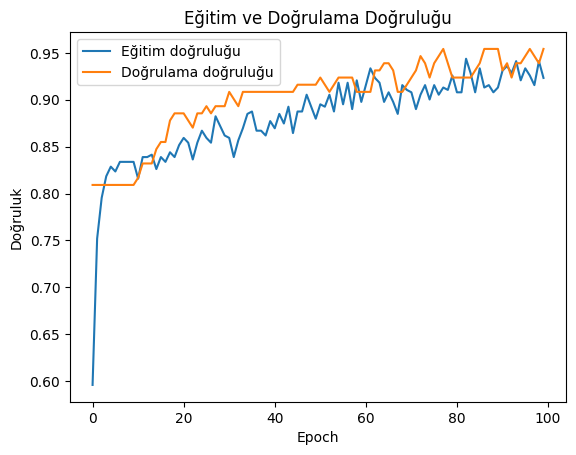

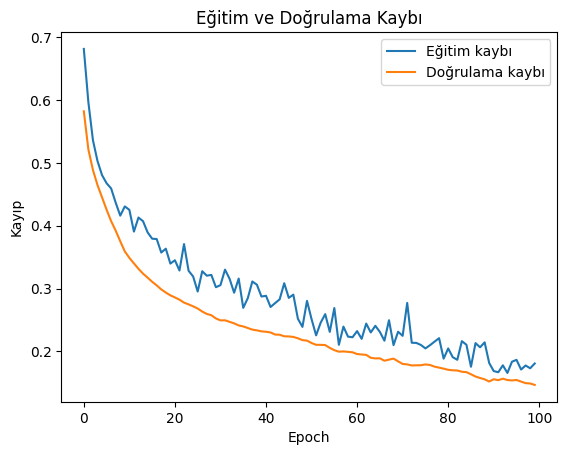

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



# Özelliklerin normalizasyonu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay Sinir Ağı Modeli
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout katmanı ekleniyor
model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout katmanı ekleniyor
model.add(Dense(units=1, activation='sigmoid'))

# Modelin derlenmesi
optimizer = 'adam'  # Adam optimizasyonu kullanıyoruz
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Erken duraklatma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modelin eğitilmesi
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Modelin test edilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

ann_loss, ann_accuracy = model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_accuracy}')

# 2. Model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Test Accuracy: {rf_accuracy}')

# 3. Model: SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Test Accuracy: {svm_accuracy}')

# Sonuçların Karşılaştırılması
print("\n=== Model Performansları ===")
print(f"ANN Accuracy: {ann_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

best_model = max([("ANN", ann_accuracy), ("Random Forest", rf_accuracy), ("SVM", svm_accuracy)], key=lambda x: x[1])
print(f"En iyi model: {best_model[0]} ({best_model[1] * 100:.2f}%)")

# Sonuçların görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Eğitim kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [80]:
# Kullanıcıdan veri almak için fonksiyonlar
def kredi_tutari_sor():
    while True:
        try:
            kredi_tutari = float(input("Kredi Tutarını girin (örneğin 5000): "))
            return kredi_tutari
        except ValueError:
            print("Lütfen geçerli bir sayı girin.")

def kredi_suresi_sor():
    while True:
        try:
            kredi_suresi = int(input("Kredi Süresini girin (ay olarak, örneğin 24): "))
            return kredi_suresi
        except ValueError:
            print("Lütfen geçerli bir sayı girin.")

def yas_sor():
    while True:
        try:
            yas = int(input("Yaşınızı girin (örneğin 30): "))
            return yas
        except ValueError:
            print("Lütfen geçerli bir sayı girin.")

def tasarruf_hesabi_sor():
    while True:
        tasarruf = input("Tasarruf Hesabınızın durumu (little, moderate, ample, rich): ").lower()
        if tasarruf in ["little", "moderate", "ample", "rich"]:
            return tasarruf
        else:
            print("Lütfen geçerli bir durum girin (little, moderate, ample).")

def is_durumu_sor():
    while True:
        is_durumu = int(input("İş durumunuzu girin (0 = yeni başlayan, 1 = tecrübeli): "))
        if is_durumu in [0, 1]:
            return is_durumu
        else:
            print("Lütfen geçerli bir seçenek girin (0 = yeni başlayan, 1 = tecrübeli).")

def ev_durumu_sor():
    while True:
        ev_durumu = input("Ev durumunuzu girin (own = ev sahibi, rent = kirada, free = başka bir durumda): ").lower()
        if ev_durumu in ["own", "rent", "free"]:
            return ev_durumu
        else:
            print("Lütfen geçerli bir durum girin (own, rent, free).")

# Risk durumu hesaplamak için fonksiyon
def risk_degerlendirmesi(kredi_tutari, kredi_suresi, yas, tasarruf, is_durumu, ev_durumu):
    risk = "Good"  # Varsayılan olarak risk iyi (GOOD)
    
    # 1. Kredi miktarı yüksek ve kredi süresi uzunsa ("Credit amount" > 10.000 DM ve "Duration" > 24), "bad".
    if kredi_tutari > 10000 and kredi_suresi > 24:
        risk = "Bad"

    # 2. Kredi miktarı düşük ve kredi süresi kısaysa ("Credit amount" < 2.000 DM ve "Duration" < 12), "good".
    elif kredi_tutari < 2000 and kredi_suresi < 12:
        risk = "Good"

    # 3. Yaş genç ve tasarruf hesabı az ise ("Age" < 25 ve "Saving accounts" = "little"), "bad".
    elif yas < 25 and tasarruf == 'little':
        risk = "Bad"

    # 4. Yaşlı ve kredi tutarı yüksekse ("Age" > 60 ve "Credit amount" > 10.000 DM), "bad".
    elif yas > 60 and kredi_tutari > 10000:
        risk = "Bad"

    # 5. İşe yeni başlamış ve kredi süresi uzunsa ("Job" = 0 ve "Duration" > 24), "bad".
    elif is_durumu == 0 and kredi_suresi > 24:
        risk = "Bad"

    # 6. Ev sahibi olmayan ve kredi tutarı yüksekse ("Housing" = "rent" veya "free" ve "Credit amount" > 10.000 DM), "bad".
    elif (ev_durumu == "rent" or ev_durumu == "free") and kredi_tutari > 10000:
        risk = "Bad"

    # 7. İşe yeni başlamış ve kredi süresi kısa ise ("Job" = 0 ve "Duration" < 12), "good".
    elif is_durumu == 0 and kredi_suresi < 12:
        risk = "Good"

    return risk


# Kullanıcıdan gerekli bilgileri al
kredi_tutari = kredi_tutari_sor()
kredi_suresi = kredi_suresi_sor()
yas = yas_sor()
tasarruf = tasarruf_hesabi_sor()
is_durumu = is_durumu_sor()
ev_durumu = ev_durumu_sor()

# Risk değerlendirmesini yap ve sonucu yazdır
risk = risk_degerlendirmesi(kredi_tutari, kredi_suresi, yas, tasarruf, is_durumu, ev_durumu)
print(f"Risk Durumu: {risk}")




Risk Durumunuz: Bad


In [81]:
# Modelin test edilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

ann_loss, ann_accuracy = model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_accuracy}')

# ANN modelini kaydetme
model.save('ann_model.h5')  # .h5 formatında kaydediyoruz
print("Model başarıyla kaydedildi!")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.1371 
Test Loss: 0.14683347940444946
Test Accuracy: 0.9541984796524048
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.1371 


ANN Test Accuracy: 0.9541984796524048
Model başarıyla kaydedildi!


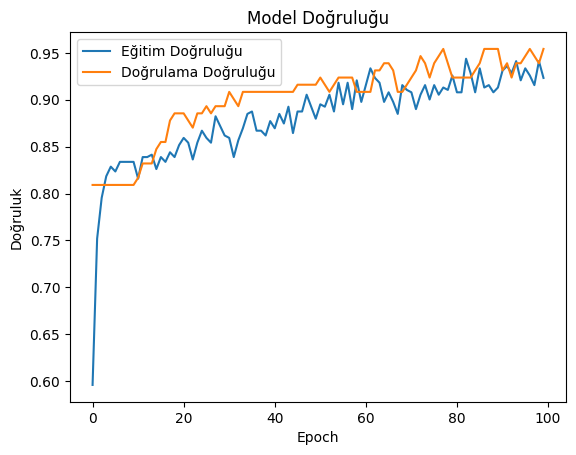

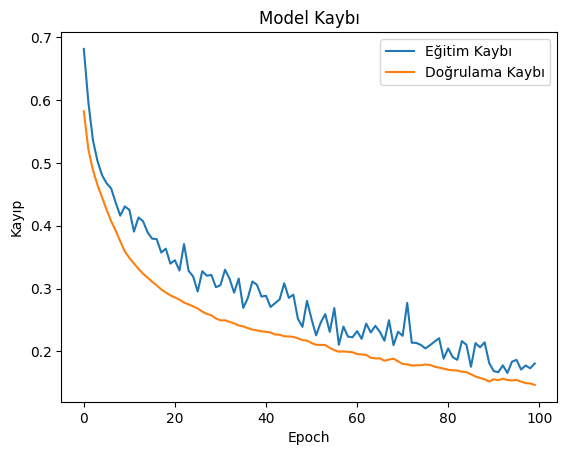

In [83]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


ara 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


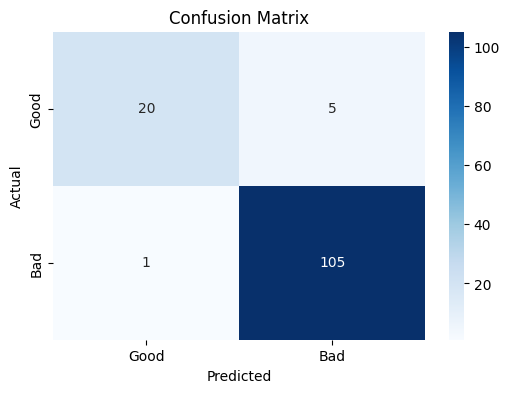

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Modelin test verisi üzerinde tahminler yapması
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Sigmoid çıktısını 0 ve 1'e dönüştürme

# Gerçek ve tahmin edilen sınıfları karşılaştır
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



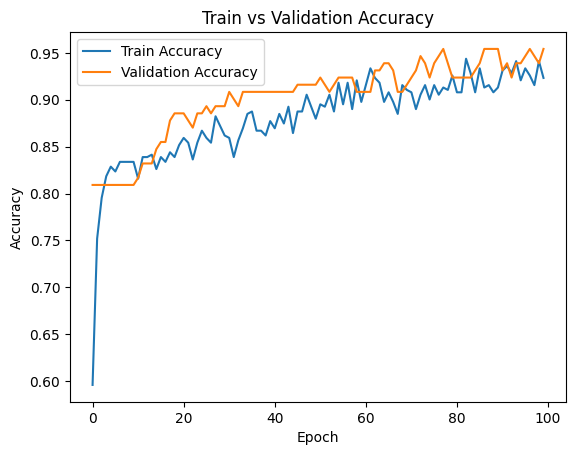

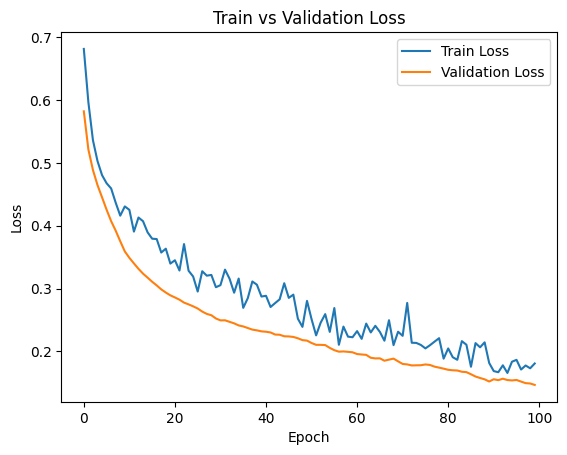

In [85]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
